# ML Project 6033657523 - Feedforward neural network

## Importing the libraries

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

## Importing the cleaned dataset

In [2]:
dataset = pd.read_csv('Final_data.csv')
X = dataset.drop(['Unnamed: 0','price'], axis=1)
y = dataset['price']

In [3]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


## Splitting the dataset into the Training set and Test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feedforward neural network

### Fitting Feedforward neural network to the Training Set

In [4]:

# Define neural network architecture
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.weights1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.randn(self.hidden_dim, self.output_dim)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1)
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights2)
        return self.z2

# Define genetic algorithm
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, input_dim, hidden_dim, output_dim):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            nn = NeuralNetwork(self.input_dim, self.hidden_dim, self.output_dim)
            population.append(nn)
        return population

    def select_parents(self, population, scores):
        sorted_indices = np.argsort(scores)
        selected_indices = sorted_indices[:2]  # Select the top 2 individuals
        return [population[i] for i in selected_indices]

    def crossover(self, parent1, parent2):
        child1 = NeuralNetwork(self.input_dim, self.hidden_dim, self.output_dim)
        child2 = NeuralNetwork(self.input_dim, self.hidden_dim, self.output_dim)
        # Perform crossover
        crossover_point = np.random.randint(parent1.hidden_dim)
        child1.weights1 = np.vstack((parent1.weights1[:crossover_point, :], parent2.weights1[crossover_point:, :]))
        child2.weights1 = np.vstack((parent2.weights1[:crossover_point, :], parent1.weights1[crossover_point:, :]))
        crossover_point = np.random.randint(parent1.output_dim)
        child1.weights2 = np.vstack((parent1.weights2[:crossover_point, :], parent2.weights2[crossover_point:, :]))
        child2.weights2 = np.vstack((parent2.weights2[:crossover_point, :], parent1.weights2[crossover_point:, :]))
        return [child1, child2]

    def mutate(self, child):
        # Apply mutation to some weights
        for i in range(child.input_dim):
            for j in range(child.hidden_dim):
                if np.random.rand() < self.mutation_rate:
                    child.weights1[i, j] += np.random.randn() * 0.1  # Mutation step size
        for i in range(child.hidden_dim):
            for j in range(child.output_dim):
                if np.random.rand() < self.mutation_rate:
                    child.weights2[i, j] += np.random.randn() * 0.1  # Mutation step size
        return child

    def evolve_population(self, population, scores):
        parents = self.select_parents(population, scores)
        next_population = parents.copy()  # Keep the top individuals
        while len(next_population) < self.population_size:
            parent1 = np.random.choice(parents)
            parent2 = np.random.choice(parents)
            children = self.crossover(parent1, parent2)
            for child in children:
                if len(next_population) < self.population_size:
                    next_population.append(self.mutate(child))
        return next_population










In [6]:
# Define hyperparameters
population_size = 5000
mutation_rate = 0.1
num_generations = 10

# Initialize genetic algorithm and population
ga = GeneticAlgorithm(population_size, mutation_rate, X_train.shape[1], 10, 1)
population = ga.initialize_population()

# Train the neural networks using genetic algorithm
for generation in range(num_generations):
    scores = []
    for nn in population:
        train_predictions = nn.forward(X_train)
        # Calculate mean squared error (MSE) as fitness function
        mse = mean_squared_error(y_train, train_predictions.flatten())
        scores.append(mse)
    best_mse = min(scores)
    print(f"Generation {generation+1}, Best MSE: {best_mse}")
    population = ga.evolve_population(population, scores)

# Select the best neural network from the final population
best_nn = min(population, key=lambda nn: mean_squared_error(y_train, nn.forward(X_train).flatten()))

# Evaluate the best neural network on the test set
test_predictions = best_nn.forward(X_test)
test_mse = mean_squared_error(y_test, test_predictions.flatten())
print(f"Test MSE: {test_mse}")

In [8]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148417,1,4,0,0,4,1,1,19.42,6,13524
36879,3,2,0,1,5,1,1,7.00,13,9940
274531,1,4,0,0,0,1,0,21.17,44,55983
166397,5,3,5,0,1,0,1,10.25,11,7927
272722,5,4,5,0,5,1,0,26.50,5,55502


## Evaluate model accuracy

In [10]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,1,2,4,0,1,4,1,19.75,40,7366
266857,5,4,4,0,5,5,0,9.83,42,64831
141228,5,4,4,0,5,0,1,10.50,41,6195
288329,5,1,5,0,4,2,0,14.50,14,60160
97334,1,0,0,0,5,5,1,8.25,20,6578


Compare GenPrice with PredictedGenPrice

In [12]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(test_predictions, name = 'PredictedPrice')], axis = 1).round(2)
datasetPredict.head(10)

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
0,27131,1,2,4,0,1,4,1,19.75,40,7366,5696.98
1,266857,5,4,4,0,5,5,0,9.83,42,64831,62634.26
2,141228,5,4,4,0,5,0,1,10.50,41,6195,7398.41
3,288329,5,1,5,0,4,2,0,14.50,14,60160,53873.28
4,97334,1,0,0,0,5,5,1,8.25,20,6578,6830.19
5,135931,0,4,1,0,0,0,1,10.83,5,4555,12388.24
6,290630,5,1,0,2,0,5,0,2.00,7,23838,29411.73
7,141944,3,4,1,0,0,0,1,7.75,46,3860,5002.00
8,244517,1,5,5,0,5,1,0,26.33,44,32230,49581.50
9,215903,5,2,5,0,2,4,0,20.17,2,76841,64208.79


In [13]:
datasetPredict.corr()

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
index,1.000000,0.184656,-0.087756,0.091498,-0.128608,0.026470,0.020889,-0.801685,0.167555,0.019587,0.760820,0.778099
airline,0.184656,1.000000,-0.030061,0.052285,-0.027956,0.037172,-0.026444,-0.183062,-0.001198,-0.010591,0.247096,0.253999
source_city,-0.087756,-0.030061,1.000000,0.000629,0.002251,0.039460,-0.219337,-0.002933,0.007664,-0.007628,0.006965,0.007666
departure_time,0.091498,0.052285,0.000629,1.000000,-0.015022,-0.045902,-0.001146,-0.055038,0.090452,0.000632,0.060217,0.061359
stops,-0.128608,-0.027956,0.002251,-0.015022,1.000000,0.004413,-0.010485,0.103969,-0.472470,-0.015345,-0.203027,-0.208678
arrival_time,0.026470,0.037172,0.039460,-0.045902,0.004413,1.000000,-0.035265,-0.022071,0.010202,-0.008933,0.038758,0.039204
destination_city,0.020889,-0.026444,-0.219337,-0.001146,-0.010485,-0.035265,1.000000,-0.001194,0.003362,-0.005631,0.006989,0.007334
class,-0.801685,-0.183062,-0.002933,-0.055038,0.103969,-0.022071,-0.001194,1.000000,-0.145016,0.012049,-0.938095,-0.963946
duration,0.167555,-0.001198,0.007664,0.090452,-0.472470,0.010202,0.003362,-0.145016,1.000000,-0.035719,0.208457,0.213878
days_left,0.019587,-0.010591,-0.007628,0.000632,-0.015345,-0.008933,-0.005631,0.012049,-0.035719,1.000000,-0.091088,-0.093024


In [16]:
# train_r_squared = regressor.lr.score(regressor.poly.transform(X_train), y_train)
# test_r_squared = regressor.lr.score(regressor.poly.transform(X_test), y_test)
# print("Training set accuracy = " + str(train_r_squared))
# print("Test set accuracy = " + str(test_r_squared))

Training set accuracy = 0.9478772826342768
Test set accuracy = 0.9468870434771944


Training set accuracy = 0.9885445650077587<br>
Test set accuracy = 0.9829187423043221

### MSE

In [17]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))

MSE: 27378787.584340483


### MAPE

In [18]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, test_predictions))

MAPE: 23.820611601007013


### Visualize

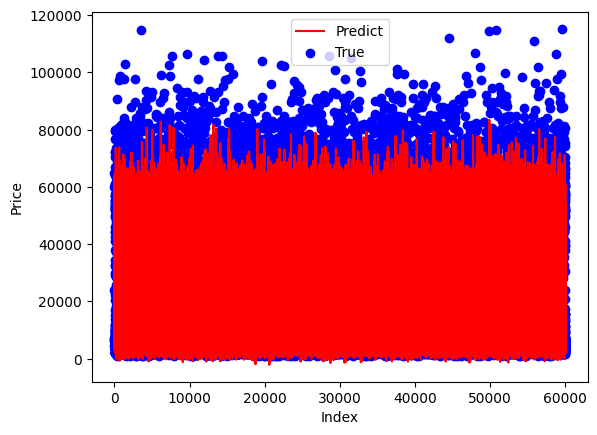

In [19]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(test_predictions))], test_predictions, color = 'r')
plt.scatter([i for i in range(len(test_predictions))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

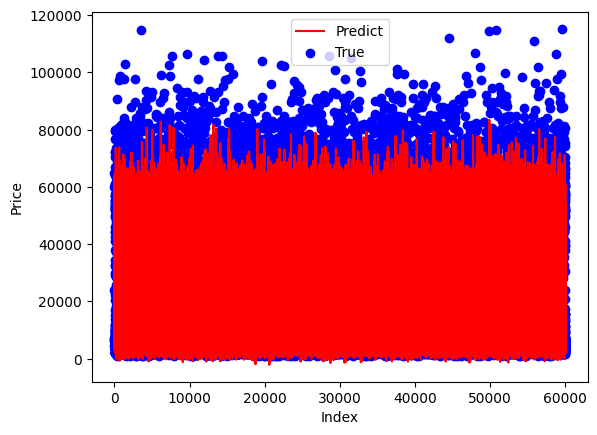

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()